In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
microdados_ = pd.read_pickle('microdados_.pkl')


In [3]:
microdados_.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [118]:
microdados_[['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_ESCOLA']].sample(5)


,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_ESCOLA
1178036,NaN,NaN,NaN,Não Respondeu
255169,NaN,NaN,NaN,Não Respondeu
1353799,NaN,NaN,NaN,Não Respondeu
1507307,NaN,NaN,NaN,Não Respondeu
228434,NaN,NaN,NaN,Não Respondeu


### 01. Explorando o efeito do componente raça na nota

In [4]:
comp_raca = microdados_[microdados_['TP_COR_RACA'].isin(['Preta', 'Branca'])]


In [56]:
def add_value_labels(ax, spacing=3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [75]:
group_raca = comp_raca[['TP_COR_RACA', 'nota_media_geral']].groupby(['TP_COR_RACA']).mean().reset_index()
group_raca

,TP_COR_RACA,nota_media_geral
0,Branca,552.141366
1,Preta,499.780068


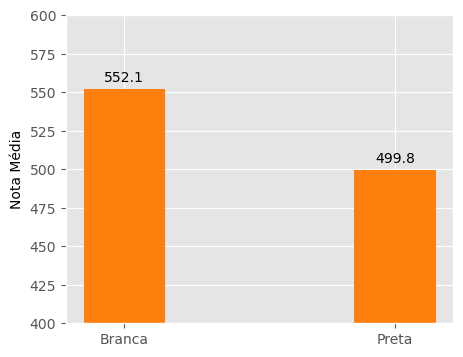

In [72]:
fig, ax = plt.subplots(figsize=(5, 4))


race = group_raca['TP_COR_RACA']
nota = group_raca['nota_media_geral']
bar_labels = ['Branca', 'Preta']
bar_colors = ['tab:orange', 'tab:orange']

ax.bar(race, nota, label=bar_labels, color=bar_colors, width=0.3, align='center')

ax.set_ylabel('Nota Média')
#ax.set_title('Nota média por raça declarada')
#ax.legend(title='Raça')
ax.set_ylim([400,600])
add_value_labels(ax)

plt.show()

In [77]:
group_raca_renda = comp_raca[(comp_raca['Q006']=='Até R$ 1.212,00')|(comp_raca['Q006']=='Nenhuma Renda')][['TP_COR_RACA', 'nota_media_geral']].groupby(['TP_COR_RACA']).mean().reset_index()
group_raca_renda

,TP_COR_RACA,nota_media_geral
0,Branca,498.414571
1,Preta,473.933652


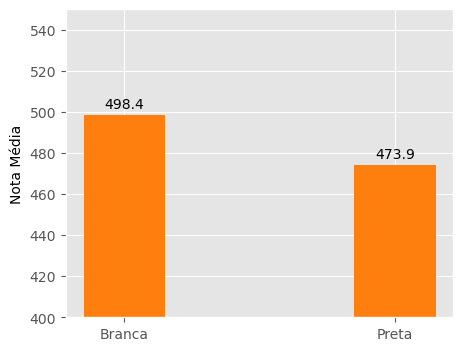

In [79]:
fig, ax = plt.subplots(figsize=(5, 4))


race = group_raca_renda['TP_COR_RACA']
nota = group_raca_renda['nota_media_geral']
bar_labels = ['Branca', 'Preta']
bar_colors = ['tab:orange', 'tab:orange']

ax.bar(race, nota, label=bar_labels, color=bar_colors, width=0.3, align='center')

ax.set_ylabel('Nota Média')
#ax.set_title('Nota média por raça declarada')
#ax.legend(title='Raça')
ax.set_ylim([400,550])
add_value_labels(ax)

plt.show()

In [88]:
group_raca_renda_escola = comp_raca[((comp_raca['Q006']=='Até R$ 1.212,00')|(comp_raca['Q006']=='Nenhuma Renda'))&(comp_raca['TP_DEPENDENCIA_ADM_ESC'].isin(['Estadual', 'Municipal']))][['TP_COR_RACA', 'nota_media_geral']].groupby(['TP_COR_RACA']).mean().reset_index()
group_raca_renda_escola

,TP_COR_RACA,nota_media_geral
0,Branca,483.966654
1,Preta,458.313967


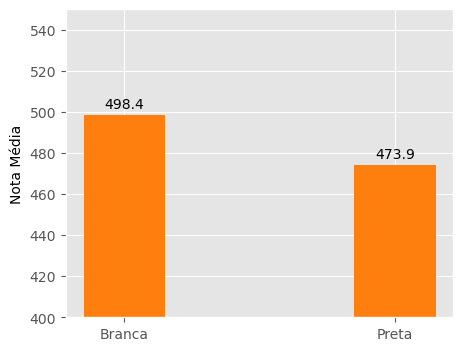

In [79]:
fig, ax = plt.subplots(figsize=(5, 4))


race = group_raca_renda['TP_COR_RACA']
nota = group_raca_renda['nota_media_geral']
bar_labels = ['Branca', 'Preta']
bar_colors = ['tab:orange', 'tab:orange']

ax.bar(race, nota, label=bar_labels, color=bar_colors, width=0.3, align='center')

ax.set_ylabel('Nota Média')
#ax.set_title('Nota média por raça declarada')
#ax.legend(title='Raça')
ax.set_ylim([400,550])
add_value_labels(ax)

plt.show()

In [110]:
lista_controle = ['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_UF_ESC', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'icp', 'id', 'CO_MUNICIPIO_ESC']

lista_dif = []
lista_itens_controle = []
for i in range(len(lista_controle)+1):
    controle = lista_controle[:i]

    pivot = pd.pivot_table(comp_raca, values='nota_media_geral', index=controle,
                           columns=['TP_COR_RACA'], aggfunc=['mean', 'count']).reset_index()

    pivot = pivot[(pd.isna(pivot[('mean', 'Branca')])==False)&(pd.isna(pivot[('mean', 'Preta')])==False)]
    pivot['dif'] = pivot[('mean', 'Branca')] - pivot[('mean', 'Preta')]
    pivot['count_'] = pivot[('count', 'Branca')] + pivot[('count', 'Preta')]
    media_ponderada = (pivot['dif']*pivot['count_']).sum()/pivot['count_'].sum()
    print(controle, media_ponderada)
    lista_dif.append(media_ponderada)
    lista_itens_controle.append(len(controle))
    

[] 52.36129840586602
['TP_ESCOLA'] 45.418645462085145
['TP_ESCOLA', 'TP_ENSINO'] 36.2222538177523
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC'] 34.640162195693506
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'] 34.554032593008536
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'] 34.53697072830406
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_UF_ESC'] 32.64552902538492
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_UF_ESC', 'TP_FAIXA_ETARIA'] 29.758682923181517
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_UF_ESC', 'TP_FAIXA_ETARIA', 'TP_SEXO'] 29.577476498006977
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_UF_ESC', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'icp'] 21.25252102482546
['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPEN

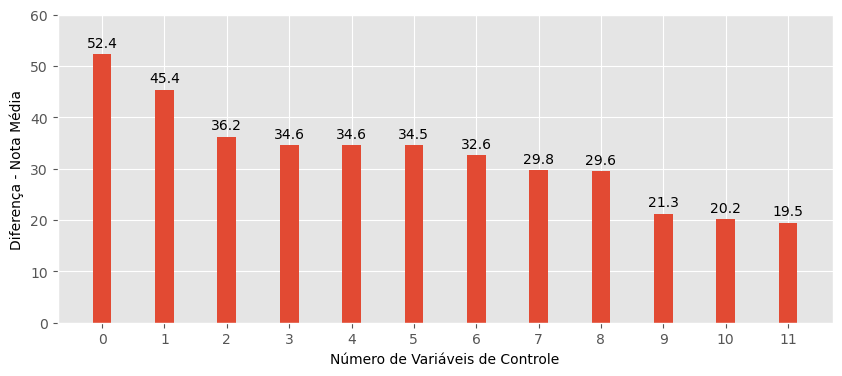

In [117]:
fig, ax = plt.subplots(figsize=(10, 4))


itens_controle = lista_itens_controle
media_dif = lista_dif
bar_labels = itens_controle
#bar_colors = ['tab:orange', 'tab:orange']

ax.bar(itens_controle, media_dif, label=bar_labels, width=0.3, align='center')
#ax.plot(itens_controle, media_dif, label=bar_labels)


ax.set_ylabel('Diferença - Nota Média')
ax.set_xlabel('Número de Variáveis de Controle')
#ax.set_title('Nota média por raça declarada')
#ax.legend(title='Raça')
ax.set_ylim([0,60])
add_value_labels(ax)
plt.xticks(np.arange(min(itens_controle), max(itens_controle)+1, 1.0))

plt.show()